In [1]:
from PIL import Image 
import pytesseract

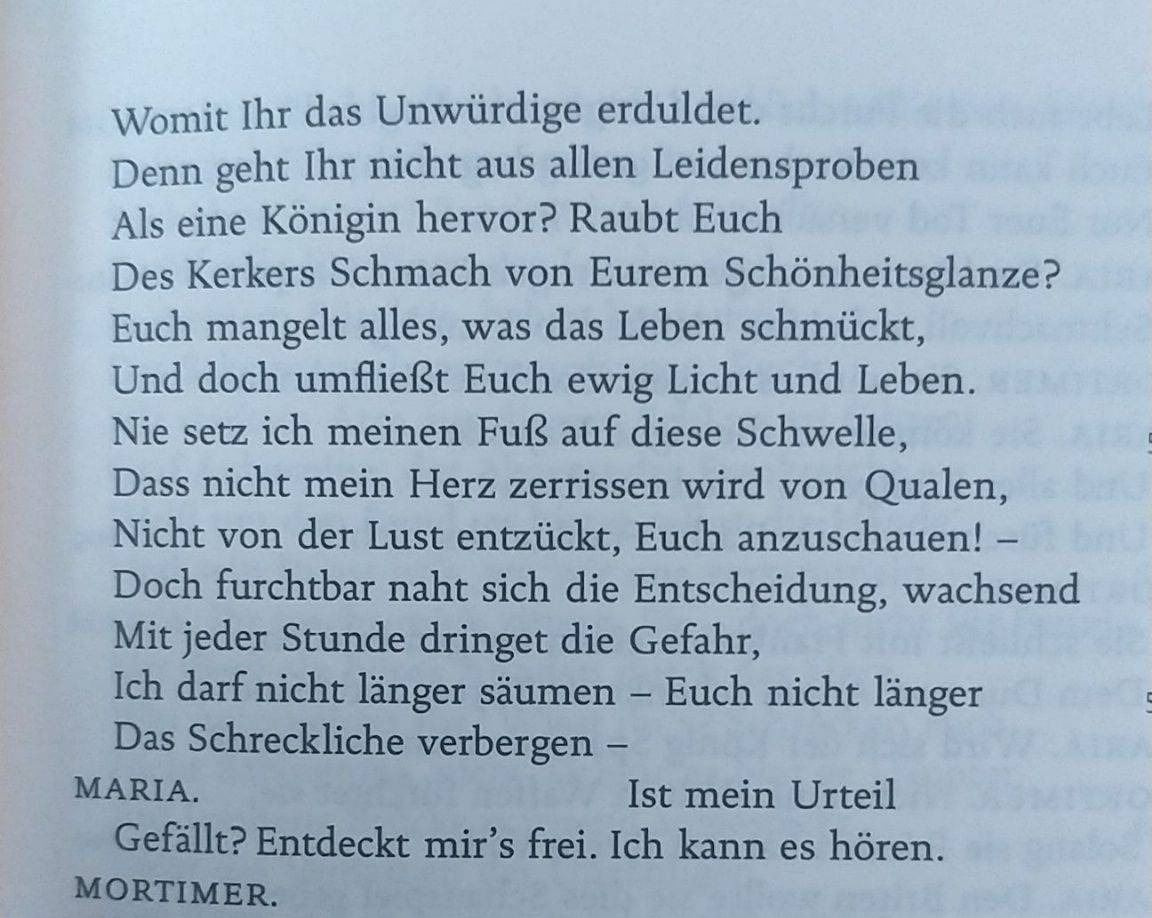

In [2]:
import IPython.display 
IPython.display.Image(filename='schiller.jpeg') 

In [3]:
print(pytesseract.get_languages(config=''))

['deu', 'eng', 'osd']


In [4]:
text = pytesseract.image_to_string(Image.open('schiller.jpeg'), lang = "deu")
print(text)

Womit Ihr das Unwürdige erduldet.
Denn geht Ihr nicht aus allen Leidensproben
Als eine Königin hervor? Raubt Euch
Des Kerkers Schmach von Eurem Schönheitsglanze?
Euch mangelt alles, was das Leben schmückt,
Und doch umfließt Euch ewig Licht und Leben.
Nie setz ich meinen Fuß auf diese Schwelle,
Dass nicht mein Herz zerrissen wird von Qualen,
Nicht von der Lust entzückt, Euch anzuschauen! -
Doch furchtbar naht sich die Entscheidung, wachsend
Mit jeder Stunde dringet die Gefahr,
Ich darf nicht länger säumen - Euch nicht länger
Das Schreckliche verbergen -

MARIA. Ist mein Urteil

Gefällt? Entdeckt mir’s frei. Ich kann es hören.
MORTIMER.



In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [6]:
model = AutoModelForSequenceClassification.from_pretrained("model.save")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-german-cased")

reverse_author_mapping = { 0 : "Goethe, Johann Wolfgang von",
                           1 : "Schiller, Friedrich",}

In [7]:
encoding = tokenizer(text, return_tensors="pt")

In [8]:

model.eval()
model.to(device)
output = model(encoding["input_ids"].to(device), encoding["attention_mask"].to(device))
logits = output.logits
probs = F.softmax(logits, dim=1)
prediction = torch.argmax(logits, dim=-1).item()
print(reverse_author_mapping[prediction])
print(probs)

Goethe, Johann Wolfgang von
tensor([[0.5814, 0.4186]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
